<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/EDL_5_1_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
#@title Defining Imports
#numpy
import numpy as np
import math
#PyTorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
#plotting
from matplotlib import pyplot as plt
from IPython.display import clear_output
#for performance timing
import time

In [ ]:
results = []

In [ ]:
#@title Setting Hyperparameters
hp_test = "lr = 3.5e-01" #@param {type:"string"}
learning_rate = 3.5e-01
epochs = 500
middle_layer = 16
batch_size = 25
data_step = .5
data_min = -5
data_max = 5

# Creating Data

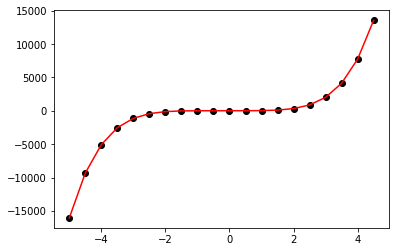

In [ ]:
#@title Creating data from function and reshaping
def function(x):
  return (2*x + 3*x**2 + 4*x**3 + 5*x**4 + 6*x**5 + 10) 

Xi = np.reshape(np.arange(data_min,data_max, data_step), (-1, 1))
yi = function(Xi)
inputs = Xi.shape[1]
yi = yi.reshape(-1, 1)
plt.plot(Xi, yi, 'o', color='black')
plt.plot(Xi,yi, color="red")

In [ ]:
tensor_x = torch.Tensor(Xi) # transform to torch tensor
tensor_y = torch.Tensor(yi)

dataset = TensorDataset(tensor_x,tensor_y) # create your datset
dataloader = DataLoader(dataset, batch_size= batch_size, shuffle=True) # create your dataloader

# Building the Model

In [ ]:
#@title Define the Model
class Net(nn.Module):
  def __init__(self, inputs, middle):
    super().__init__()
    self.fc1 = nn.Linear(inputs,middle)    
    self.fc2 = nn.Linear(middle,middle)    
    self.out = nn.Linear(middle,1)
  def forward(self, x):
    x = F.relu(self.fc1(x))     
    x = F.relu(self.fc2(x))    
    x = self.out(x)
    return x

In [ ]:
#@title Create the model
model = Net(inputs, middle_layer)
print(model)

Net(
  (fc1): Linear(in_features=1, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=1, bias=True)
)


In [ ]:
#@title Define loss function (criterion) and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

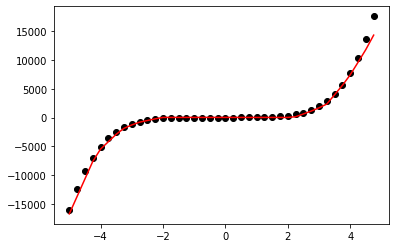

[499] Loss = 1651014.25


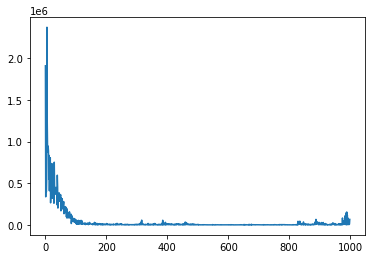

In [ ]:
#@title Training the Model
epoch_report = 25
history = []
start = time.time()
for i in range(epochs):        
  for X, y in iter(dataloader):
    # wrap the data in variables
    x_batch = Variable(torch.Tensor(X))
    y_batch = Variable(torch.Tensor(y))                   
    # forward pass
    y_pred = model(x_batch)        
    # compute and print loss
    loss = loss_fn(y_pred, y_batch)  
    history.append(loss.data/batch_size)         
    # reset gradients
    optimizer.zero_grad()        
    # backwards pass
    loss.backward()        
    # step the optimizer - update the weights
    optimizer.step()  
  if (i+1) % epoch_report == 0:
    clear_output()
    y_ = model(tensor_x)
    plt.plot(Xi, yi, 'o', color='black')
    plt.plot(Xi,y_.detach().numpy(), 'r')
    plt.show()
    print(f"[{i}] Loss = {loss.data}")
    time.sleep(1)
plt.plot(history)
end = time.time() - start

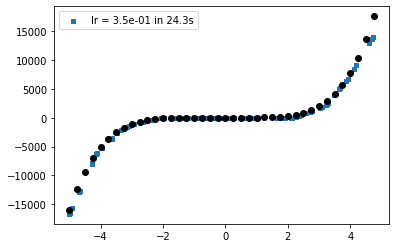

In [ ]:
X_a = torch.rand(100,1).clone() * 10 - 5
y_a = model(X_a)
y_a = y_a.detach().numpy()
results.append([hp_test,end, X_a, y_a])

fig = plt.figure()
ax1 = fig.add_subplot(111)
for test,t,x,y in results:
  ax1.scatter(x, y, s=10, marker="s", label=f"{test} in {t:0.1f}s")

plt.legend(loc='upper left')
plt.plot(Xi, yi, 'o', color='black')
plt.show()